In [3]:
import sys
sys.path.append('../..')

In [13]:
import os
import numpy as np
from lib.path import get_training_data_dir
from data_loader.SingleDataLoader import SingleDataLoader
import matplotlib.pyplot as plt

In [5]:
data_dir = '../../../data'
pdb_list_path = os.path.join(data_dir, 'all_protein')

In [6]:
DATA_TYPE1 = 'gr'
DATA_VOXEL_NUM = 10
CLASSIFYING_RULE = 'WaterClassifyingRuleSurface'
LIGAND_POCKET_DEFINER = 'LigandPocketDefinerOriginal'
LIGAND_VOXEL_NUM = 8
training_data_dir = get_training_data_dir(DATA_TYPE1, DATA_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER, LIGAND_VOXEL_NUM)

In [8]:
data_loader = SingleDataLoader(training_data_dir)
gr_data, label = data_loader.load_data(pdb_list_path)

Error processing 2p15: No data found for 2p15
Error processing 2pog: No data found for 2pog
Error processing 3kr4: No data found for 3kr4
Error processing 4ajl: No data found for 4ajl
Error processing 1olu: No data found for 1olu
Error processing 3ebo: No data found for 3ebo
Error processing 4lvt: No data found for 4lvt
Error processing 4lxd: No data found for 4lxd
Error processing 2d3u: No data found for 2d3u
Error processing 2d3z: No data found for 2d3z
Error processing 2zkj: No data found for 2zkj
Error processing 2zq0: No data found for 2zq0
Error processing 2j47: No data found for 2j47
Error processing 4jn2: No data found for 4jn2
Error processing 4u0f: No data found for 4u0f
Error processing 5afv: No data found for 5afv
Error processing 3t60: No data found for 3t60
Error processing 3t70: No data found for 3t70
Error processing 4p58: No data found for 4p58
Error processing 4poh: No data found for 4poh
Error processing 4poj: No data found for 4poj
Error processing 3i4b: No data fou

In [9]:
SASA = np.load('ave_sasa.npy')

In [12]:
gr_sum = [np.array(gr).sum() for gr in gr_data]

In [18]:
SASA.shape, len(gr_sum)

((2719,), 74138)

ValueError: x and y must be the same size

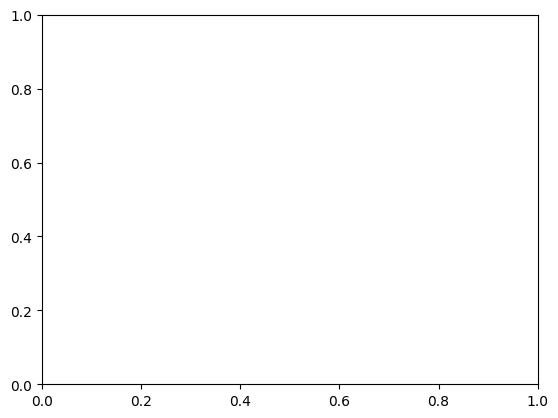

In [14]:
plt.scatter(SASA, gr_sum, color='blue', label='Data points')  # 元のデータポイント